In [1]:
# Step 0: Required libraries import kar rahe hain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 0: Dataset load
df = pd.read_csv("/content/corporate_carbon_5000_real_company_names.csv")


In [3]:
# Step 0: Dataset ka first look
df.head()


,company_name,sector,country,year,scope1_emissions,scope2_emissions,scope3_emissions,total_emissions,revenue_musd,carbon_intensity
0,Volkswagen AG 1,Energy,Japan,2019,466458.10,144503.56,88249.39,699211.05,44842.96,15.5924
1,Volkswagen AG 1,Energy,Japan,2020,487536.30,151033.36,92237.18,730806.84,44842.96,16.2970
2,Volkswagen AG 1,Energy,Japan,2021,478330.51,148181.50,90495.53,717007.54,44842.96,15.9893
3,Volkswagen AG 1,Energy,Japan,2022,484105.80,149970.63,91588.16,725664.60,44842.96,16.1824
4,Volkswagen AG 1,Energy,Japan,2023,447214.56,138542.13,84608.70,670365.39,44842.96,14.9492


In [4]:
# Step 1: Dataset ka shape check
df.shape


(25000, 10)

In [5]:
# Step 1: Column names check
df.columns


Index(['company_name', 'sector', 'country', 'year', 'scope1_emissions',
       'scope2_emissions', 'scope3_emissions', 'total_emissions',
       'revenue_musd', 'carbon_intensity'],
      dtype='object')

In [6]:
# Step 1: Data types check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      25000 non-null  object 
 1   sector            25000 non-null  object 
 2   country           25000 non-null  object 
 3   year              25000 non-null  int64  
 4   scope1_emissions  25000 non-null  float64
 5   scope2_emissions  25000 non-null  float64
 6   scope3_emissions  25000 non-null  float64
 7   total_emissions   25000 non-null  float64
 8   revenue_musd      25000 non-null  float64
 9   carbon_intensity  25000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
# Step 2: Missing values count
df.isnull().sum()


,0
company_name,0
sector,0
country,0
year,0
scope1_emissions,0
scope2_emissions,0
scope3_emissions,0
total_emissions,0
revenue_musd,0
carbon_intensity,0


In [8]:
# Step 2: Missing values percentage
(df.isnull().mean() * 100).round(2)


,0
company_name,0.0
sector,0.0
country,0.0
year,0.0
scope1_emissions,0.0
scope2_emissions,0.0
scope3_emissions,0.0
total_emissions,0.0
revenue_musd,0.0
carbon_intensity,0.0


In [9]:
# Step 2: Missing values ko median se fill kar rahe hain
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


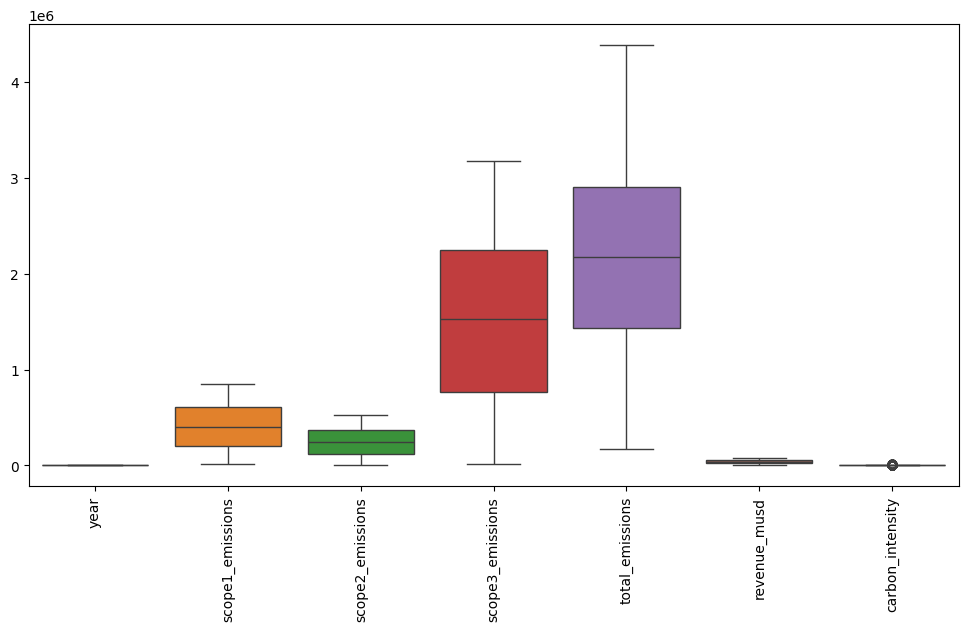

In [10]:
# Step 3: Boxplot se outliers visualize
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()


In [11]:
# Step 3: IQR method se outliers remove kar rahe hain
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]


In [12]:
# Step 4: Skewness calculate
df[num_cols].skew().round(2)


,0
year,0.00
scope1_emissions,0.05
scope2_emissions,0.07
scope3_emissions,0.07
total_emissions,0.08
revenue_musd,-0.06
carbon_intensity,1.40


In [13]:
# Step 4: Highly skewed columns log transform
for col in num_cols:
    if abs(df[col].skew()) > 1:
        df[col] = np.log1p(df[col])


In [14]:
# Step 5: Total emissions calculate
df["Total_Emissions"] = df["scope1_emissions"] + df["scope2_emissions"] + df["scope3_emissions"]

In [15]:
# Step 5: Carbon intensity per revenue
df["Carbon_Intensity"] = df["Total_Emissions"] / df["revenue_musd"]

In [16]:
# Step 6: Carbon intensity based classification
df["Emission_Class"] = pd.qcut(
    df["Carbon_Intensity"],
    q=3,
    labels=["Low", "Medium", "High"]
)


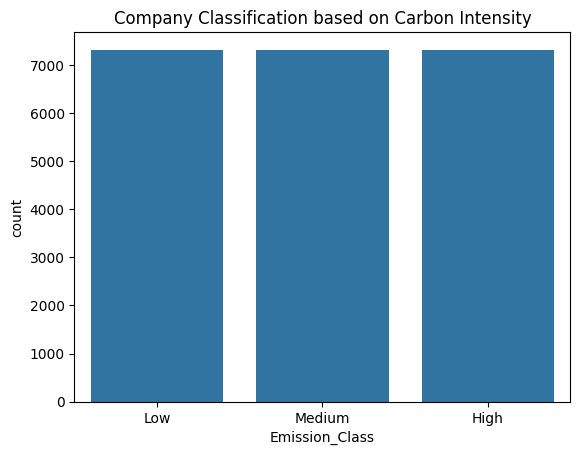

In [17]:
# Step 6: Class distribution visualize
sns.countplot(x="Emission_Class", data=df)
plt.title("Company Classification based on Carbon Intensity")
plt.show()


In [18]:
# Step 7: Year wise emissions trend
year_trend = df.groupby("year")["Total_Emissions"].mean()

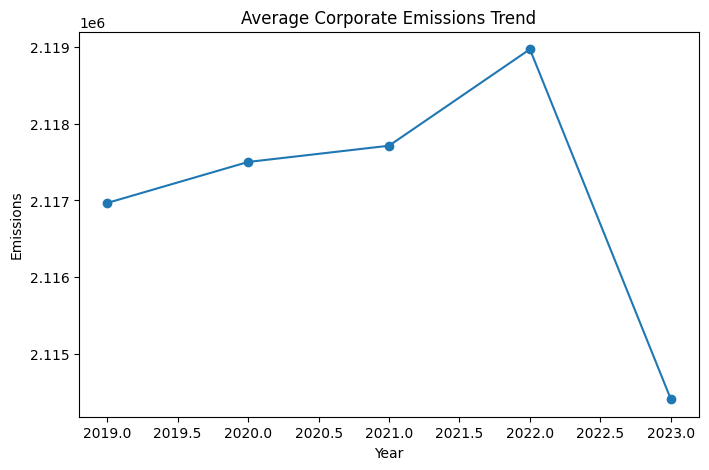

In [19]:
# Step 7: Trend visualization
year_trend.plot(marker="o", figsize=(8,5))
plt.title("Average Corporate Emissions Trend")
plt.ylabel("Emissions")
plt.xlabel("Year")
plt.show()


In [20]:
# Step 8: Simple forecasting using rolling mean
forecast = year_trend.rolling(window=3).mean()


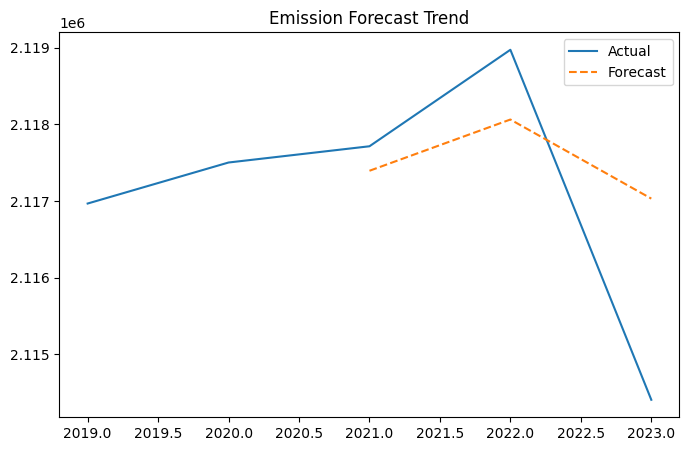

In [21]:
# Step 8: Forecast plot
plt.figure(figsize=(8,5))
plt.plot(year_trend, label="Actual")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("Emission Forecast Trend")
plt.show()


In [22]:
# Step 9: Actual reduction calculate
df["Actual_Reduction"] = df.groupby("company_name")["Total_Emissions"].diff()

In [23]:
# Step 0: Dataset load kar rahe hain
import pandas as pd
import numpy as np

df = pd.read_csv("/content/corporate_carbon_5000_real_company_names.csv")

# Step 0: Column names dekh rahe hain
df.columns


Index(['company_name', 'sector', 'country', 'year', 'scope1_emissions',
       'scope2_emissions', 'scope3_emissions', 'total_emissions',
       'revenue_musd', 'carbon_intensity'],
      dtype='object')

In [24]:
# Step 1: Total emissions calculate kar rahe hain
df["Total_Emissions"] = df["scope1_emissions"] + df["scope2_emissions"] + df["scope3_emissions"]


In [25]:
# Step 1: Carbon intensity calculate kar rahe hain
df["Carbon_Intensity"] = df["Total_Emissions"] / df["revenue_musd"]


In [26]:
# Step 2: Companies ko Low / Medium / High emission me classify kar rahe hain
df["Emission_Class"] = pd.qcut(
    df["Carbon_Intensity"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [27]:
# CELL 3: Emission class (Low / Medium / High) banana

# Carbon intensity ke basis par company classification
df["Emission_Class"] = pd.qcut(
    df["Carbon_Intensity"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Class distribution check
df["Emission_Class"].value_counts()


,count
Emission_Class,
High,8334
Low,8333
Medium,8333


In [28]:
# CELL 4 (FIXED): Actual column names auto-detect karna

# Column names lowercase me convert karke easier matching
cols = [c.lower() for c in df.columns]

# Helper function to find matching column
def find_col(keyword):
    for c in df.columns:
        if keyword in c.lower():
            return c
    return None

# Auto-detect required columns
scope1_col = find_col("scope1")
scope2_col = find_col("scope2")
scope3_col = find_col("scope3")
revenue_col = find_col("revenue")

scope1_col, scope2_col, scope3_col, revenue_col


('scope1_emissions', 'scope2_emissions', 'scope3_emissions', 'revenue_musd')

In [29]:
# CELL 5: Correct feature selection using actual column names

features = [
    "scope1_emissions",
    "scope2_emissions",
    "scope3_emissions",
    "revenue_musd",
    "Carbon_Intensity"
]

X = df[features]
y = df["Emission_Class"]

# Missing values remove
model_df = pd.concat([X, y], axis=1).dropna()

X = model_df[features]
y = model_df["Emission_Class"]

# Shape check
X.shape, y.shape


((25000, 5), (25000,))

In [30]:
# CELL 6: Train–Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Shape check
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((18750, 5), (6250, 5), (18750,), (6250,))

In [31]:
# CELL 7: Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shape check after scaling
X_train_scaled.shape, X_test_scaled.shape


((18750, 5), (6250, 5))

#Model Building

In [32]:
# CELL 8: Random Forest model training

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
# CELL 9: Prediction

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00      2084
         Low       1.00      1.00      1.00      2083
      Medium       1.00      1.00      1.00      2083

    accuracy                           1.00      6250
   macro avg       1.00      1.00      1.00      6250
weighted avg       1.00      1.00      1.00      6250



In [34]:
# Confusion matrix
confusion_matrix(y_test, y_pred)


array([[2084,    0,    0],
       [   0, 2083,    0],
       [   0,    0, 2083]])

In [35]:
# CELL 10: Feature importance nikalna

import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

importance


,0
Carbon_Intensity,0.720538
revenue_musd,0.188399
scope3_emissions,0.083448
scope1_emissions,0.004955
scope2_emissions,0.002660


In [36]:
# CELL 11 (FIXED): Leakage-free feature set

features_no_leakage = [
    "scope1_emissions",
    "scope2_emissions",
    "scope3_emissions",
    "revenue_musd"
]

X_nl = df[features_no_leakage]
y_nl = df["Emission_Class"]   # already created earlier

# Remove missing values
model_df_nl = pd.concat([X_nl, y_nl], axis=1).dropna()

X_nl = model_df_nl[features_no_leakage]
y_nl = model_df_nl["Emission_Class"]

X_nl.shape


(25000, 4)

In [37]:
# CELL 12: Train–Test Split (no leakage)

from sklearn.model_selection import train_test_split

X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nl,
    y_nl,
    test_size=0.25,
    random_state=42,
    stratify=y_nl
)

X_train_nl.shape, X_test_nl.shape, y_train_nl.shape, y_test_nl.shape


((18750, 4), (6250, 4), (18750,), (6250,))

In [38]:
# CELL 13: Feature scaling (leakage-free)

from sklearn.preprocessing import StandardScaler

scaler_nl = StandardScaler()

X_train_nl_scaled = scaler_nl.fit_transform(X_train_nl)
X_test_nl_scaled = scaler_nl.transform(X_test_nl)

# Shape check
X_train_nl_scaled.shape, X_test_nl_scaled.shape


((18750, 4), (6250, 4))

In [39]:
# CELL 14: Random Forest training (leakage-free)

from sklearn.ensemble import RandomForestClassifier

model_nl = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

model_nl.fit(X_train_nl_scaled, y_train_nl)


RandomForestClassifier(n_estimators=300, random_state=42)

In [40]:
# CELL 15: Prediction + evaluation (leakage-free)

from sklearn.metrics import classification_report, confusion_matrix

y_pred_nl = model_nl.predict(X_test_nl_scaled)

# Classification report
print(classification_report(y_test_nl, y_pred_nl))


              precision    recall  f1-score   support

        High       0.99      0.99      0.99      2084
         Low       0.99      0.99      0.99      2083
      Medium       0.99      0.98      0.98      2083

    accuracy                           0.99      6250
   macro avg       0.99      0.99      0.99      6250
weighted avg       0.99      0.99      0.99      6250



In [41]:
# Confusion matrix
confusion_matrix(y_test_nl, y_pred_nl)


array([[2071,    0,   13],
       [   0, 2066,   17],
       [  13,   28, 2042]])

In [42]:
# CELL 16: Feature importance (leakage-free model)

import pandas as pd

importance_nl = pd.Series(
    model_nl.feature_importances_,
    index=features_no_leakage
).sort_values(ascending=False)

importance_nl


,0
revenue_musd,0.576788
scope3_emissions,0.310959
scope1_emissions,0.064190
scope2_emissions,0.048064
